In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import the required files

In [2]:
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')
#import every required csv files


In [3]:
trader_df.head()
#check the body "historical data file"

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
sentiment_df.head()
#check the body "greed csv file"

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
trader_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [6]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date
sentiment_df.head()


,timestamp,value,classification,date,Date
0,1517463000,30,Fear,2018-02-01,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02,2018-02-02
2,1517635800,40,Fear,2018-02-03,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05,2018-02-05


In [7]:
daily_trader = trader_df.groupby('Date').agg({
    'Closed PnL': 'sum',
    'Execution Price': 'mean',
    'Size USD': 'sum',
    'Fee': 'sum'
}).reset_index()

print(daily_trader)

           Date     Closed PnL  Execution Price     Size USD          Fee
0    2023-05-01       0.000000      1898.133333       477.00     0.000000
1    2023-12-05       0.000000     11038.300000     50005.83    12.501455
2    2023-12-14    -205.434737      8031.868818    113203.35    28.300831
3    2023-12-15     -24.632034         2.982000     10609.95     2.652489
4    2023-12-16       0.000000         0.384707     15348.77     3.837189
..          ...            ...              ...          ...          ...
475  2025-04-27    2702.067468     13133.751885    487537.69    55.926773
476  2025-04-28   36906.813759     58469.141862  26124921.49  6007.251404
477  2025-04-29  125749.613427     28548.785993  34089511.66  5149.295287
478  2025-04-30   14003.797269     35649.303644  12693878.85  2950.183773
479  2025-05-01   54536.829297     12672.104182  10720240.52  2652.613678

[480 rows x 5 columns]


In [8]:
merged_df = pd.merge(daily_trader, sentiment_df[['Date', 'classification']], on='Date', how='left')

merged_df.head()

,Date,Closed PnL,Execution Price,Size USD,Fee,classification
0,2023-05-01,0.000000,1898.133333,477.00,0.000000,Greed
1,2023-12-05,0.000000,11038.300000,50005.83,12.501455,Extreme Greed
2,2023-12-14,-205.434737,8031.868818,113203.35,28.300831,Greed
3,2023-12-15,-24.632034,2.982000,10609.95,2.652489,Greed
4,2023-12-16,0.000000,0.384707,15348.77,3.837189,Greed


In [9]:
print(merged_df['classification'].value_counts())
print(merged_df.groupby('classification')['Closed PnL'].describe())



Greed            193
Extreme Greed    114
Fear              91
Neutral           67
Extreme Fear      14
Name: classification, dtype: int64
                count          mean            std            min         25%  \
classification                                                                  
Extreme Fear     14.0  52793.589178  101262.394065  -76880.729036 -838.820628   
Extreme Greed   114.0  23817.292199   72827.301581 -127075.399585  586.782411   
Fear             91.0  36891.818040   96611.848503 -122672.000883    0.000000   
Greed           193.0  11140.566181   62427.957949 -419020.225731    0.000000   
Neutral          67.0  19297.323516   37995.209071  -10116.875552    0.000000   

                         50%           75%            max  
classification                                             
Extreme Fear    22561.739636  58201.908546  269328.365917  
Extreme Greed    3127.536297  10985.000642  599151.795008  
Fear             1412.314654  25612.124225  616413.0

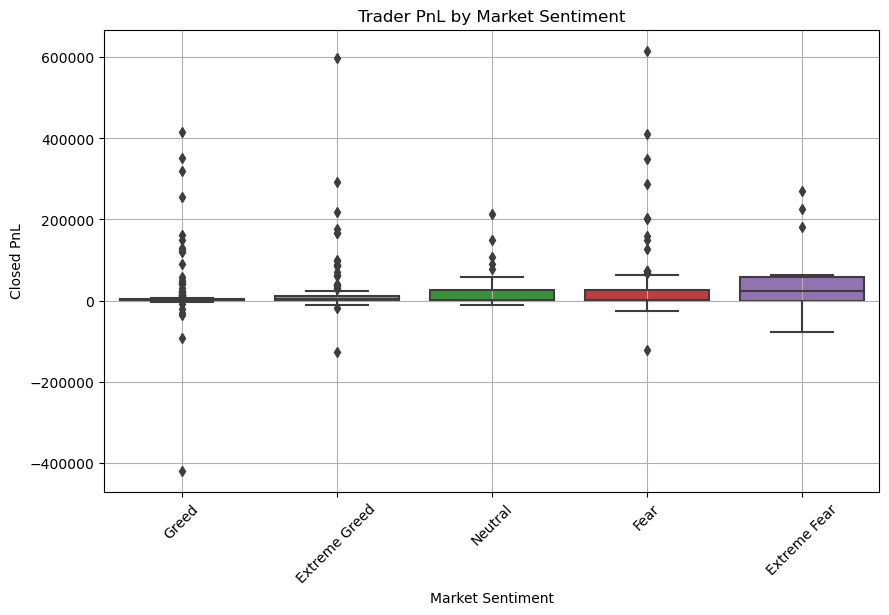

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title('Trader PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [15]:

from scipy.stats import ttest_ind
greed_pnl = merged_df[merged_df['classification'].fillna("").str.contains('Greed', case=False)]['Closed PnL']
fear_pnl = merged_df[merged_df['classification'].fillna("").str.contains('Fear', case=False)]['Closed PnL']

from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(greed_pnl, fear_pnl, nan_policy='omit')
print(f"T-test Results:\nT-statistic = {t_stat:.3f}\nP-value = {p_val:.5f}")

if p_val < 0.05:
    print("Statistically significant difference between Greed and Fear periods.")
else:
    print("No statistically significant difference found.")


T-test Results:
T-statistic = -2.715
P-value = 0.00691
Statistically significant difference between Greed and Fear periods.


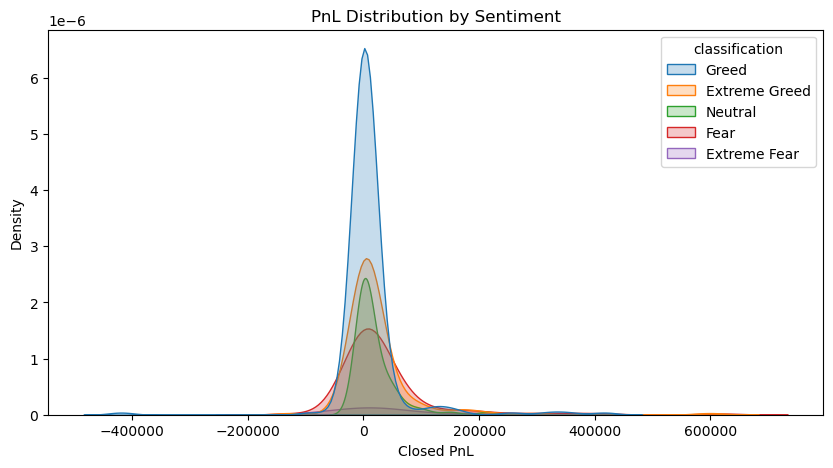

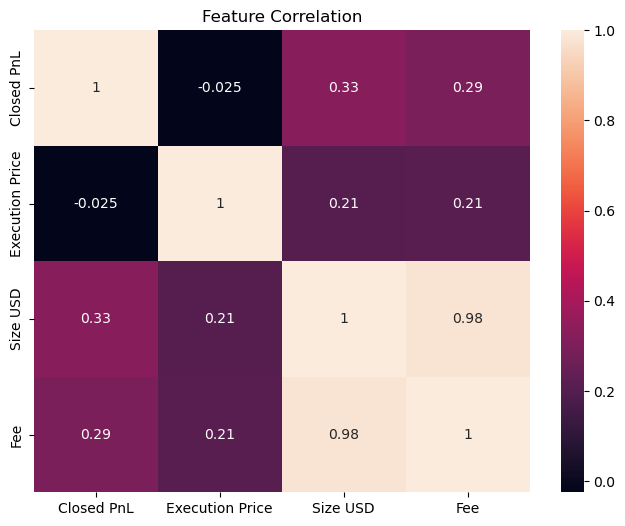

In [16]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=merged_df, x='Closed PnL', hue='classification', fill=True)
plt.title('PnL Distribution by Sentiment')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['Closed PnL', 'Execution Price', 'Size USD', 'Fee']].corr(), annot=True)
plt.title("Feature Correlation")
plt.show()


In [17]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

merged_df['sentiment_code'] = LabelEncoder().fit_transform(merged_df['classification'])
merged_df['profitable'] = (merged_df['Closed PnL'] > 0).astype(int)

X = merged_df[['sentiment_code', 'Execution Price', 'Size USD', 'Fee']]
y = merged_df['profitable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.25      0.24        16
           1       0.85      0.84      0.84        80

    accuracy                           0.74        96
   macro avg       0.54      0.54      0.54        96
weighted avg       0.75      0.74      0.74        96

Confusion Matrix:
 [[ 4 12]
 [13 67]]
